# Part 5. Data summary visualisation

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Dar_survey_tidied.csv')
#df2=pd.read_csv('/content/drive/My Drive/test.csv')

In [40]:
df.head()

,tower,what_type_of_work_is_here,income_confidence,income_assessment,land_use,comment,area_size_sqkm,cdr_users,mfs_users,user_ratio,cdr_density,mfs_density,building_count,building_density,residential,income_cleaned,income_adjusted,voronoi
0,2020,Commercial,High,Wealthy / Very Wealthy,Commercial / Formal Residential,NaN,0.096075,257.0,111.0,2.315315,0.000374,0.000866,167,1738.222529,True,wealthy,wealthy,0103000020E610000001000000060000003F01F8F115A4...
1,2056,Skilled manual labour,High,Wealthy,Entertainment / Hotel,Golf Course,0.495916,139.0,68.0,2.044118,0.003568,0.007293,14,28.230615,NaN,wealthy,wealthy,0103000020E61000000100000007000000FD90E8C608A5...
2,2026,Skilled manual labour,High,Very Wealthy,Formal Residential,NaN,240.330005,103.0,59.0,1.745763,2.333301,4.073390,249,1.036075,True,wealthy,wealthy,0103000020E6100000010000000B000000731436EBB6A4...
3,2091,Unskilled manual labour,High,Average,Informal Peri-Urban,NaN,21.213397,1073.0,765.0,1.402614,0.019770,0.027730,2477,116.765832,NaN,average,average,0103000020E61000000100000008000000A0E99D06AAAF...
4,2024,Commercial,High,Very Wealthy,Formal Residential,NaN,0.729215,263.0,136.0,1.933824,0.002773,0.005362,244,334.606274,True,wealthy,wealthy,0103000020E61000000100000007000000481B458A03A4...


In [0]:
df=pd.merge(df1,df2,on='tower')

In [41]:
df.describe()

,tower,area_size_sqkm,cdr_users,mfs_users,user_ratio,cdr_density,mfs_density,building_count,building_density
count,523.000000,523.000000,521.000000,521.000000,521.000000,521.000000,521.000000,523.000000,523.000000
mean,1746.950287,5.723644,694.163148,492.019194,1.479480,0.034558,0.060249,1499.114723,1791.585071
std,190.258267,28.286814,486.917868,353.147637,0.228951,0.327181,0.628509,1187.244738,1549.360402
min,1384.000000,0.027532,2.000000,1.000000,1.000000,0.000125,0.000222,9.000000,0.167662
25%,1581.000000,0.397177,326.000000,218.000000,1.373041,0.000640,0.000924,703.500000,606.991001
50%,1748.000000,0.767532,594.000000,416.000000,1.405229,0.001533,0.002286,1270.000000,1336.344141
75%,1905.500000,2.168474,974.000000,691.000000,1.470167,0.005055,0.007293,1994.000000,2667.980964
max,2117.000000,455.708198,2274.000000,1526.000000,3.000000,6.597947,13.195894,7967.000000,10463.325441


In [0]:
import numpy as np
test=df[np.abs(df.area_size_sqkm-df.area_size_sqkm.mean()) <= (3*df.area_size_sqkm.std())]

In [43]:
import numpy as np
area=test.describe()['area_size_sqkm'][1]
length=np.sqrt(area)
print(round(length*1000,2)/2)

874.285


In [45]:
area=test.describe()['area_size_sqkm'][1]
area

3.0574998675965177

In [47]:
(874.285*2)

1748.57

https://epsg.io/3857

## checking the percentage

In [0]:
wealthy=df[df['income_adjusted']=='wealthy']
average=df[df['income_adjusted']=='average']
poor=df[df['income_adjusted']=='poor']

In [49]:
print(len(wealthy))
print(len(average))
print(len(poor))

169
145
209


In [50]:
print('wealthy percentage:'+str(len(wealthy)/len(df)))
print('average percantage:'+str(len(average)/len(df)))
print('poor percentage:'+ str(len(poor)/len(df)))

wealthy percentage:0.3231357552581262
average percantage:0.27724665391969405
poor percentage:0.39961759082217974


## checking distibution 

### area_size_sqkm

In [51]:
wealthy.describe()['area_size_sqkm'][1]#include area contain large sea

7.784691846305329

In [52]:
average.describe()['area_size_sqkm'][1]

6.314731772229654

In [53]:
poor.describe()['area_size_sqkm'][1]

3.646970602899043

In [54]:
import numpy as np
wealthy_b=wealthy[np.abs(wealthy.area_size_sqkm-wealthy.area_size_sqkm.mean()) <= (3*wealthy.area_size_sqkm.std())]
print(len(wealthy_b))
average_b=average[np.abs(average.area_size_sqkm-average.area_size_sqkm.mean()) <= (3*average.area_size_sqkm.std())]
print(len(average_b))
poor_b=poor[np.abs(poor.area_size_sqkm-poor.area_size_sqkm.mean()) <= (3*poor.area_size_sqkm.std())]
print(len(poor_b))


166
142
204


In [55]:
print(wealthy_b.describe()['area_size_sqkm'][1])
print(average_b.describe()['area_size_sqkm'][1])
print(poor_b.describe()['area_size_sqkm'][1])

2.593869946621084
2.731888481707043
2.5935427567568636


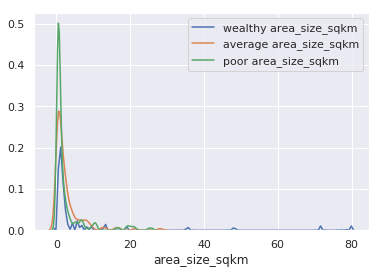

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(6,4))
sns.set(color_codes=True)
sns.distplot(wealthy_b.area_size_sqkm,hist=False,label="wealthy area_size_sqkm")
sns.distplot(average_b.area_size_sqkm,hist=False, label="average area_size_sqkm")
sns.distplot(poor_b.area_size_sqkm,hist=False,label="poor area_size_sqkm")
plt.legend();

### building_count

In [57]:
print(wealthy.describe()['building_count'][1])
print(average.describe()['building_count'][1])
print(poor.describe()['building_count'][1])

729.0295857988166
1668.558620689655
2004.2583732057417


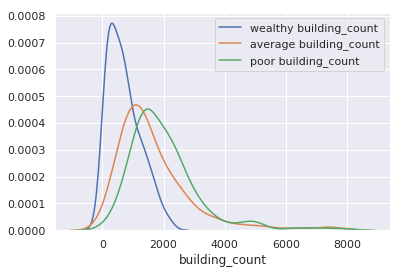

In [58]:
sns.distplot(wealthy_b.building_count,hist=False, label="wealthy building_count")
sns.distplot(average_b.building_count, hist=False, label="average building_count")
sns.distplot(poor_b.building_count,hist=False,label="poor building_count")
plt.legend();

### building_density

In [59]:
print(wealthy.describe()['building_density'][1])
print(average.describe()['building_density'][1])
print(poor.describe()['building_density'][1])

1390.2979583624858
1457.0922840245123
2348.1351949950135


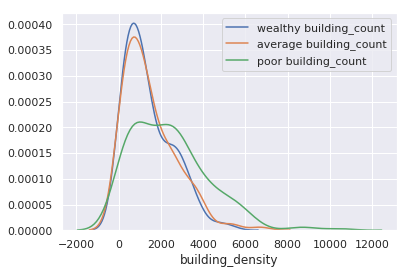

In [60]:
sns.distplot(wealthy_b.building_density,hist=False, label="wealthy building_count")
sns.distplot(average_b.building_density, hist=False, label="average building_count")
sns.distplot(poor_b.building_density,hist=False,label="poor building_count")
plt.legend();

### land_use

In [61]:
#wealthy
pd.DataFrame(wealthy.groupby('land_use')['tower'].count()/len(wealthy)).sort_values(by=['tower'],ascending=False).head()

,tower
land_use,
Formal Residential,0.514793
Informal Residential,0.082840
Commercial / Formal Residential,0.076923
Informal Peri-Urban,0.035503
Peri-Urban,0.029586


In [62]:
#average
pd.DataFrame(average.groupby('land_use')['tower'].count()/len(average)).sort_values(by=['tower'],ascending=False).head()

,tower
land_use,
Informal Residential,0.255172
Informal Peri-Urban,0.227586
Formal Residential,0.186207
Formal Residential / Informal Residential,0.062069
Industrial / Informal Residential,0.041379


In [63]:
#poor
pd.DataFrame(poor.groupby('land_use')['tower'].count()/len(poor)).sort_values(by=['tower'],ascending=False).head()

,tower
land_use,
Informal Residential,0.468900
Informal Peri-Urban,0.205742
Formal Residential / Informal Residential,0.071770
Peri-Urban,0.052632
Industrial / Informal Residential,0.043062


### what type of user is here

In [64]:
pd.DataFrame(wealthy.groupby('what_type_of_work_is_here')['tower'].count()/len(wealthy)).sort_values(by=['tower'],ascending=False)


,tower
what_type_of_work_is_here,
Commercial,0.331361
Unskilled manual labour,0.301775
Skilled manual labour,0.218935
Office services,0.130178
Hospitality services,0.017751


In [65]:
pd.DataFrame(average.groupby('what_type_of_work_is_here')['tower'].count()/len(average)).sort_values(by=['tower'],ascending=False)

,tower
what_type_of_work_is_here,
Unskilled manual labour,0.682759
Commercial,0.172414
Skilled manual labour,0.110345
Office services,0.034483


In [66]:
pd.DataFrame(poor.groupby('what_type_of_work_is_here')['tower'].count()/len(poor)).sort_values(by=['tower'],ascending=False)


,tower
what_type_of_work_is_here,
Unskilled manual labour,0.784689
Commercial,0.119617
Skilled manual labour,0.062201
Office services,0.023923
